# 1. Chargement du CSV

In [1]:
import csv 
def load_csv(file):
    rows = []
    with open(file, newline='',encoding='utf-8-sig') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            rows.append(row)
    return rows

In [2]:
import nltk
from nltk.tokenize import word_tokenize

def get_words(tweets):
    L = []
    tweets_2 = [row.get('tweet') for row in tweets if row.get('tweet') != None]
    for k in range(len(tweets_2)) :
        sentence = word_tokenize(tweets_2[k])
        for word in sentence :
            L.append(word)
    return L 

In [3]:
import nltk
import string
from nltk.corpus import stopwords

def clean(words_list) :
    filtered_words = [word for word in words_list if word not in stopwords.words('english')]
    filtered_words = [''.join(c for c in s if c not in string.punctuation) for s in filtered_words]
    filtered_words = [s for s in filtered_words if s]
    filtered_words = [s for s in filtered_words if len(s) > 1]
    return filtered_words

## 1.1 Lecture du premier CSV Pepsi

In [4]:
pepsi = load_csv('../data/extraction_twint/tweets_data/data_marketing_personalise/pepsi.csv')
words = get_words(pepsi)
print(words[:20])


['0', '.', 'Universeclass', ',', 'start', 'a', 'list', 'of', 'the', 'stuff', 'you', 'plan', 'to', 'release', 'because', 'it', 'slows', 'you', 'down', '.']


## 1.2 Detection de 'Faux' Tweets

In [9]:
for row in Tweets :
    if 'PEPSI' in row[0].upper() :
        row[2] = True
    else :
        for hastags in row[1] :
            if 'PEPSI' in hastags.upper() :
                row[2] = True
Tweets[0:5]
compte = 0
false_users = []
for row in Tweets :
    if row[2] :
        compte +=1
    else :
        false_users.append(int(row[3]))
        
print(compte)
false_users

100


[]

In [10]:
import pandas as pd 
users_pd = pd.read_csv('../data/extraction_twint/tweets_data/data_marketing_personalise/pepsi_users.csv')
masque = users_pd['user_id'] == 2981521646
users_pd[masque]

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date


## 1.3 Sentiment Analysis

In [7]:
import re
from textblob import TextBlob

def clean_tweet(tweet): 

    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split()) 
    
def get_tweet_sentiment(tweet): 
 
    analysis = TextBlob(clean_tweet(tweet)) 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'
    
print(Tweets[0][0])
print(clean_tweet(Tweets[0][0]))
get_tweet_sentiment(Tweets[0][0])

0. Universeclass, start a list of the stuff you plan to release because it slows you down. Line through--no return!--when achieved. 1. Here is our short list: Pepsi/soft drinks, meat, Fear, other . . .
0 Universeclass start a list of the stuff you plan to release because it slows you down Line through--no return!--when achieved 1 Here is our short list Pepsi/soft drinks meat Fear other .


'negative'

In [11]:
Tweets = []
for row in pepsi :
    Tweets.append([row.get('tweet'),row.get('hashtags'), False, row.get('user_id')])
    
for row in Tweets :
    sentiment = get_tweet_sentiment(row[0])
    row.append(sentiment)
print(len(Tweets))
print(Tweets[:5])
df = pd.DataFrame(Tweets, columns = ['Tweet', 'Hashtags', 'True', 'UserId', 'Sentiment'])
df = df[['UserId','Sentiment']]
UserSentiment = df
df
df.loc[df['UserId'] == '516997857']['Sentiment'].iloc[0]

100
[['0. Universeclass, start a list of the stuff you plan to release because it slows you down. Line through--no return!--when achieved. 1. Here is our short list: Pepsi/soft drinks, meat, Fear, other . . .', '[]', False, '387079035', 'negative'], ['Hoping to check this off my bucket list!! @Pepsi #PepsiHalftimeSweeps', "['#pepsihalftimesweeps']", False, '1080290909789581312', 'neutral'], ['Tweets from Billboard Charts, artists with most #1 hits on Hot 100, Cardi B has 3. Headline Planet update on Ed Sheeran, Camila Cabello & Cardi B "South Of The Border". Mike On Air with Billboard list. Pepsi Naija &…  https://www.instagram.com/p/B5_DrZAhX-n/?igshid=2eg4z6ualzy6\xa0…', '[]', False, '1172754034886893568', 'positive'], ['you did not just list pepsi as a fave drink', '[]', False, '716061519599968257', 'neutral'], ['Too many to list.  “Pepsi > Coke”; “Android > iOS”; “Bing > Google”; “Walmart > Amazon”; “XRP > BTC”', '[]', False, '516997857', 'positive']]


'positive'

# 2. NER avec Spacy


In [12]:
import spacy
from spacy import displacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")

In [13]:

NER = []
tweets = load_csv('../data/extraction_twint/tweets_data/data_marketing_personalise/pepsi_users.csv')
print(len(tweets))
for row in tweets :
    if row.get('tweet') != None :
        (text, user) = ( nlp(row.get('tweet')) , row.get('user_id') )
        NER.append((text , user))          

9164


In [14]:
from random import randint
NER_2 = []
for X in NER : 
    sentiment = get_tweet_sentiment(X[0].text)
    NER_2.append((X[0], sentiment, X[1]))
k = randint(1, len(NER_2))
k
print(NER_2[k])

(I agree thank you Allen!, 'neutral', '172887246')


## Including our sentiment analysis

In [15]:
Organizations = []
Groups = []
Persons = []

ORG = []
GPE = []
PER = []
k = 0
for text in NER_2 :
    k += 1
    sentiment = text[1]
    for X in text[0].ents :
        
        if X.label_ == 'ORG' and len(X.text) > 1:
            Organizations.append(X.text)
            ORG.append((X.text, sentiment, text[2]))
        if X.label_ == 'GPE' and len(X.text) > 1 :
            Groups.append(X.text)
            GPE.append((X.text, sentiment, text[2]))
        if X.label_ == 'PERSON' and len(X.text) > 1 :
            Persons.append(X.text)
            PER.append((X.text, sentiment, text[2]))
            
print(Persons[:5])
print(PER[:5])
print(len(Persons))
print(len(PER))

['Belarus', 'Nadezhda Makarchenko', 'Belarus', 'Durham', 'Neighbours Need']
[('Belarus', 'neutral', '4709135909'), ('Nadezhda Makarchenko', 'neutral', '4709135909'), ('Belarus', 'neutral', '4709135909'), ('Durham', 'neutral', '798251830140604416'), ('Neighbours Need', 'neutral', '4709135909')]
3318
3318


In [16]:
def list_to_dict(list) :
    counts = dict()
    for i in list:
        counts[i] = counts.get(i, 0) + 1
    counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1], reverse = True)}
    return (counts)

def to_perc(dict) :
    for key in dict : 
        dict[key] = (dict[key]/ len(NER))*100
               

## Converting our list to a Dataframe

In [17]:
import pandas as pd

def to_df(L) :
    L2 = []    
    for X in L :

        if X[1] == 'negative' :
            L2.append([X[0],X[2],1,0,0,0,0,0])
        if X[1] == 'neutral' :
            L2.append([X[0],X[2],0,1,0,0,0,0])
        if X[1] == 'positive' :
            L2.append([X[0],X[2],0,0,1,0,0,0])  
    for X in L2 : 
        sentiment = UserSentiment.loc[UserSentiment['UserId'] == X[1]]['Sentiment'].iloc[0]
        if sentiment == 'negative' :
            X[5] = 1
        if sentiment == 'neutral' :
            X[6] = 1
        if sentiment == 'positive' :
            X[7] = 1
        
    
    df = pd.DataFrame(L2, columns =['Entity', 'UserId','Negative','Neutral','Positive', 'Pepsi_negative','Pepsi_neutral','Pepsi_positive'])
    df = df.groupby(['Entity','UserId']).sum()

    
    df['Sum'] = df['Negative'] + df['Positive'] + df['Neutral']
    for x in ['Negative','Neutral','Positive', 'Pepsi_negative','Pepsi_neutral','Pepsi_positive','Sum'] :
        df[x] = df[x]/df['Sum']
    df = df.groupby(['Entity']).sum()
    df = df.sort_values('Sum', ascending=False)
    df = df.head(10)
    del df['Sum']
    
    return df

Pers_df = to_df(PER)
Pers_df

,Negative,Neutral,Positive,Pepsi_negative,Pepsi_neutral,Pepsi_positive
Entity,,,,,,
Trump,10.844444,8.688889,19.466667,6.0,16.0,17.0
Hillary,3.566667,5.533333,6.900000,3.0,6.0,7.0
Clinton,4.000000,7.333333,1.666667,1.0,6.0,6.0
Jesus,3.375000,3.666667,2.958333,4.0,2.0,4.0
Warren,2.300000,3.200000,1.500000,1.0,3.0,3.0
Tom,1.000000,1.000000,5.000000,0.0,2.0,5.0
Chris,0.000000,2.000000,4.000000,2.0,3.0,1.0
Nancy,1.333333,3.166667,1.500000,1.0,3.0,2.0
Bernie,0.285714,1.476190,4.238095,2.0,1.0,3.0


## 2.1 Organisations

In [18]:
Dict_Orga = list_to_dict(Organizations)
to_perc(Dict_Orga)
print(list(Dict_Orga.items())[:40])

[('IFBP', 0.6118881118881119), ('GOP', 0.34965034965034963), ('CNN', 0.2950174825174825), ('FBI', 0.2513111888111888), ('Congress', 0.2513111888111888), ('NFL', 0.2403846153846154), ('Pepsi Center', 0.2403846153846154), ('House', 0.2076048951048951), ('MSM', 0.18575174825174826), ('Senate', 0.17482517482517482), ('Pelosi', 0.17482517482517482), ('NetNeutrality', 0.15297202797202797), ('ISES', 0.1201923076923077), ('@POTUS', 0.1201923076923077), ('Christ', 0.10926573426573427), ('FYI', 0.10926573426573427), ('Apple', 0.10926573426573427), ('Bernie', 0.10926573426573427), ('FCC', 0.10926573426573427), ('Australian Broadcasting Corporation', 0.10926573426573427), ('HRC', 0.10926573426573427), ('Toyota', 0.10926573426573427), ('Medicare', 0.09833916083916085), ('Giants', 0.09833916083916085), ('ABC News', 0.09833916083916085), ('NEVER', 0.09833916083916085), ('Congrats', 0.09833916083916085), ('😺✏', 0.09833916083916085), ('BS', 0.08741258741258741), ('congress', 0.08741258741258741), ('Car

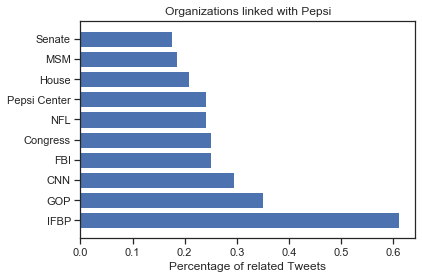

In [74]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

D = dict(list(Dict_Orga.items())[:10])
plt.barh(*zip(*D.items()))
plt.title('Organizations linked with Pepsi')
plt.xlabel('Percentage of related Tweets')
plt.show()

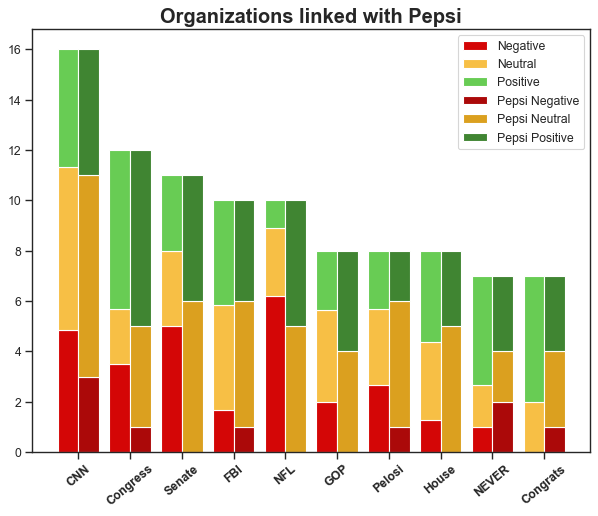

In [88]:
Org_df = to_df(ORG)

import numpy as np

barWidth = 0.4
r1 = np.arange(10)
r2 = [x + barWidth for x in r1]
figure(num=None, figsize=(9, 7), dpi=80, facecolor='w', edgecolor='k')

plt.bar(r1, Org_df['Negative'],color='#d40606',width=barWidth, label='Negative')
plt.bar(r1, Org_df['Neutral'],width=barWidth,color='#f7bf45', bottom = Org_df['Negative'], label='Neutral')
plt.bar(r1, Org_df['Positive'],width=barWidth, color='#68cc54',bottom = Org_df['Negative']+Org_df['Neutral'], label='Positive')

plt.bar(r2, Org_df['Pepsi_negative'],color='#ab0909',width=barWidth, label='Pepsi Negative')
plt.bar(r2, Org_df['Pepsi_neutral'],color='#dba01f',width=barWidth, bottom = Org_df['Pepsi_negative'], label='Pepsi Neutral')
plt.bar(r2, Org_df['Pepsi_positive'],color='#408532',width=barWidth, bottom = Org_df['Pepsi_negative']+Org_df['Pepsi_neutral'], label='Pepsi Positive')

plt.xticks((r1+r2)/2, Org_df.index, fontweight='bold', rotation=40)
plt.title('Organizations linked with Pepsi',fontweight='bold', fontsize = 18)


plt.legend()
plt.show()

## 2.2 Groupes

In [74]:
Dict_Group = list_to_dict(Groups)
to_perc(Dict_Group)
print(list(Dict_Group.items())[:40])

[('US', 1.103583916083916), ('America', 0.6337412587412588), ('Iran', 0.6118881118881119), ('Russia', 0.40428321678321677), ('Iraq', 0.30594405594405594), ('China', 0.22945804195804195), ('Texas', 0.21853146853146854), ('UK', 0.1966783216783217), ('Syria', 0.1966783216783217), ('Turkey', 0.1966783216783217), ('California', 0.1966783216783217), ('Hollywood', 0.17482517482517482), ('Colorado', 0.1638986013986014), ('Malaysia', 0.1638986013986014), ('Australia', 0.15297202797202797), ('Newcastle', 0.14204545454545456), ('Miami', 0.1201923076923077), ('Israel', 0.1201923076923077), ('London', 0.1201923076923077), ('USA', 0.1201923076923077), ('Philippines', 0.10926573426573427), ('Denver', 0.10926573426573427), ('U.S.', 0.10926573426573427), ('Qatar', 0.09833916083916085), ('Obama', 0.09833916083916085), ('Ukraine', 0.09833916083916085), ('Venezuela', 0.09833916083916085), ('Thailand', 0.09833916083916085), ('Wisconsin', 0.08741258741258741), ('New York', 0.08741258741258741), ('Cisco', 0.

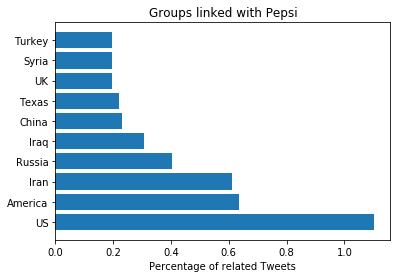

In [75]:
D = dict(list(Dict_Group.items())[:10])
plt.barh(*zip(*D.items()))
plt.title('Groups linked with Pepsi')
plt.xlabel('Percentage of related Tweets')
plt.show()

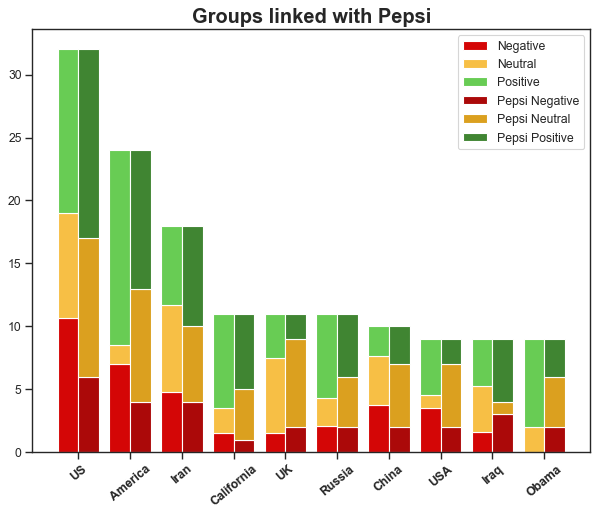

In [89]:
Gpe_df = to_df(GPE)

barWidth = 0.4
r1 = np.arange(10)
r2 = [x + barWidth for x in r1]

figure(num=None, figsize=(9, 7), dpi=80, facecolor='w', edgecolor='k')

plt.bar(r1, Gpe_df['Negative'],color='#d40606',width=barWidth, label='Negative')
plt.bar(r1, Gpe_df['Neutral'],width=barWidth,color='#f7bf45', bottom = Gpe_df['Negative'], label='Neutral')
plt.bar(r1, Gpe_df['Positive'],width=barWidth, color='#68cc54',bottom = Gpe_df['Negative']+Gpe_df['Neutral'], label='Positive')

plt.bar(r2, Gpe_df['Pepsi_negative'],color='#ab0909',width=barWidth, label='Pepsi Negative')
plt.bar(r2, Gpe_df['Pepsi_neutral'],color='#dba01f',width=barWidth, bottom = Gpe_df['Pepsi_negative'], label='Pepsi Neutral')
plt.bar(r2, Gpe_df['Pepsi_positive'],color='#408532',width=barWidth, bottom = Gpe_df['Pepsi_negative']+Gpe_df['Pepsi_neutral'], label='Pepsi Positive')

plt.xticks((r1+r2)/2, Gpe_df.index, fontweight='bold', rotation=40)
plt.title('Groups linked with Pepsi',fontweight='bold', fontsize = 18)

plt.legend()
plt.show()


## 2.3 Personnes

In [76]:
Dict_Perso = list_to_dict(Persons)
to_perc(Dict_Perso)
print(list(Dict_Perso.items())[:40])

[('Trump', 1.1909965034965033), ('the Good Vibes', 0.3933566433566434), ('Hillary', 0.38243006993006995), ('BBNaija', 0.2840909090909091), ('Cardi B', 0.26223776223776224), ('Buffalo', 0.26223776223776224), ('Jesus', 0.22945804195804195), ('Megxit', 0.21853146853146854), ('Bernie', 0.1966783216783217), ('Clinton', 0.1966783216783217), ('Evelyn', 0.18575174825174826), ('Warren', 0.17482517482517482), ('Joe Biden', 0.1638986013986014), ('Nancy', 0.14204545454545456), ('🤣🤣', 0.14204545454545456), ('Harry', 0.13111888111888112), ('Hillary Clinton', 0.13111888111888112), ('Teddy', 0.1201923076923077), ('Mullahs', 0.1201923076923077), ('Putin', 0.10926573426573427), ('Donald Trump', 0.10926573426573427), ('Bert', 0.10926573426573427), ('Chris', 0.09833916083916085), ('Dude', 0.09833916083916085), ('MAGA', 0.09833916083916085), ('Larry', 0.09833916083916085), ('Tom', 0.09833916083916085), ('God', 0.09833916083916085), ('Jackie', 0.09833916083916085), ('Greece', 0.09833916083916085), ('Bill', 

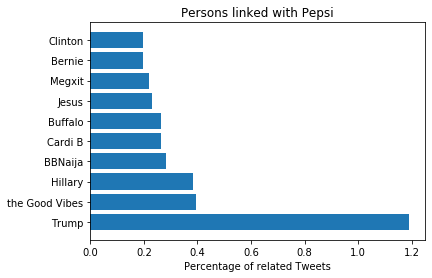

In [77]:
P = dict(list(Dict_Perso.items())[:10])
plt.barh(*zip(*P.items()))
plt.title('Persons linked with Pepsi')
plt.xlabel('Percentage of related Tweets')
plt.show()

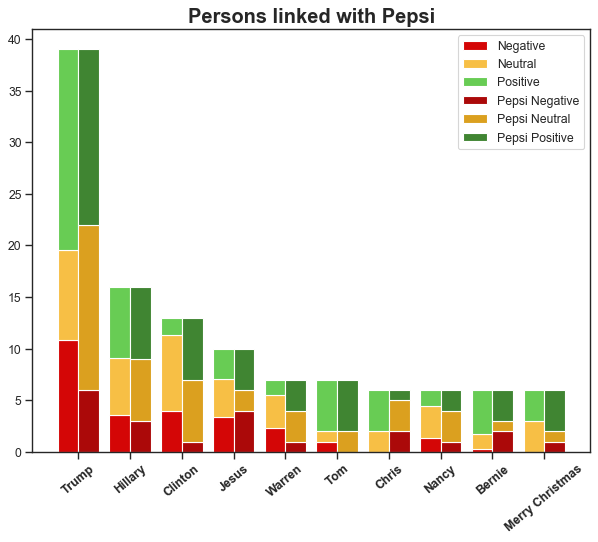

In [90]:
Pers_df = to_df(PER)

barWidth = 0.4
r1 = np.arange(10)
r2 = [x + barWidth for x in r1]

figure(num=None, figsize=(9, 7), dpi=80, facecolor='w', edgecolor='k')

plt.bar(r1, Pers_df['Negative'],color='#d40606',width=barWidth, label='Negative')
plt.bar(r1, Pers_df['Neutral'],width=barWidth,color='#f7bf45', bottom = Pers_df['Negative'], label='Neutral')
plt.bar(r1, Pers_df['Positive'],width=barWidth, color='#68cc54',bottom = Pers_df['Negative']+Pers_df['Neutral'], label='Positive')

plt.bar(r2, Pers_df['Pepsi_negative'],color='#ab0909',width=barWidth, label='Pepsi Negative')
plt.bar(r2, Pers_df['Pepsi_neutral'],color='#dba01f',width=barWidth, bottom = Pers_df['Pepsi_negative'], label='Pepsi Neutral')
plt.bar(r2, Pers_df['Pepsi_positive'],color='#408532',width=barWidth, bottom = Pers_df['Pepsi_negative']+Pers_df['Pepsi_neutral'], label='Pepsi Positive')

plt.xticks((r1+r2)/2, Pers_df.index, fontweight='bold', rotation=40)
plt.title('Persons linked with Pepsi', fontweight='bold', fontsize = 18)

plt.legend()
plt.show()

# 3. Tentative avec Stanford NLP

In [81]:
import nltk
from nltk.tag import StanfordPOSTagger
from nltk import word_tokenize

import os
java_path = "/Users/simon/jdk-13.0.2/bin/java.exe"
os.environ['JAVAHOME'] = java_path

jar = '/Users/simon/stanford-postagger-2018-10-16/stanford-postagger.jar'
model = '/Users/simon/stanford-postagger-2018-10-16/models/english-left3words-distsim.tagger'

pos_tagger = StanfordPOSTagger(model, jar, encoding='utf8')

pos_tagger.tag('Google is a big company and does not match with Apple'.split())
print('Google is a big company and does not match with Apple'.split())


['Google', 'is', 'a', 'big', 'company', 'and', 'does', 'not', 'match', 'with', 'Apple']


In [69]:
tweets = load_csv('../data/extraction_twint/tweets_data/data_marketing_personalise/pepsi_users.csv')
words_list = get_words(tweets)
print(len(tweets))
print(len(words_list))

filtered_words = clean(words_list)
print(len(filtered_words))
print(filtered_words[:100])

9164
194210
99114
['Russian', 'Belarusian', 'paratroopers', 'arrive', 'Serbia', 'take', 'part', 'drills', 'http', 'shst5zKGl', 'Belarus', 'guess', 'want', 'incinerated', 'Belarus', 'Nadezhda', 'Makarchenko', 'nominated', 'World', 'Paddle', 'Awards', '2016', 'http', 'shst5zKF9', 'Belarus', 'Have', 'look', 'Class', 'page', 'school', 'website', 'pictures', 'trip', 'Oriental', 'Museum', 'Durham', 'Longtime', 'Neighbours', 'Need', 'Share', 'Awareness', 'Plus', 'Trade', 'Investment', 'http', 'shst5zKFG', 'Belarus', 'All', 'made', 'eyes', 'start', 'twitching', 'This', 'sermon', 'still', 'hits', 'home', 'https', 'wwwfacebookcomstoryphp', 'storyfbid1536614983163429', 'id100004448263331', 'They', 'wait', 'til', 'hell', 'freezes', 'We', 'enjoying', 'syllable', 'spelling', 'game', 'pictwittercomrRkv5IxjR4', 'My', 'premium', 'deductible', 'skyrocketed', 'shitbox', 'law', 'Obamacare', 'passed', 'affordable', 'plan', 'liked', 'hundred', 'dollar', 'deductible', 'Screw', 'bullshit', 'Chris', 'https', '

In [82]:
import time
NER_2 = []
for k in range(30) :
    start = time.time()
    text = pos_tagger.tag(filtered_words[k].split())
    end = time.time()
    print(end-start, text)
    NER_2.append(text)

print(NER_2[:20])

1.1459412574768066 [('Russian', 'NNP')]
1.0981237888336182 [('Belarusian', 'JJ')]
1.0798842906951904 [('paratroopers', 'NNS')]
1.1061582565307617 [('arrive', 'VB')]
1.113178014755249 [('Serbia', 'NNP')]
1.0864498615264893 [('take', 'VB')]
1.0756447315216064 [('part', 'NN')]
1.077920913696289 [('drills', 'NNS')]
1.100095510482788 [('http', 'NN')]
1.0831758975982666 [('shst5zKGl', 'NN')]
1.0689067840576172 [('Belarus', 'NNP')]
1.064300775527954 [('guess', 'NN')]
1.106687068939209 [('want', 'VB')]
1.1260061264038086 [('incinerated', 'VBN')]
1.0938825607299805 [('Belarus', 'NNP')]
1.0808300971984863 [('Nadezhda', 'NNP')]
1.110325574874878 [('Makarchenko', 'NNP')]
1.1409482955932617 [('nominated', 'VBN')]
1.0878679752349854 [('World', 'NNP')]
1.0624468326568604 [('Paddle', 'NN')]
1.0958504676818848 [('Awards', 'NNS')]
1.1236395835876465 [('2016', 'CD')]
1.1573598384857178 [('http', 'NN')]
1.0807504653930664 [('shst5zKF9', 'NN')]
1.1149585247039795 [('Belarus', 'NNP')]
1.1507792472839355 [('

In [76]:
print(NER_2)

[[('Russian', 'NNP')], [('Belarusian', 'JJ')], [('paratroopers', 'NNS')], [('arrive', 'VB')], [('Serbia', 'NNP')], [('take', 'VB')], [('part', 'NN')], [('drills', 'NNS')], [('http', 'NN')], [('shst5zKGl', 'NN')], [('Belarus', 'NNP')], [('guess', 'NN')], [('want', 'VB')], [('incinerated', 'VBN')], [('Belarus', 'NNP')], [('Nadezhda', 'NNP')], [('Makarchenko', 'NNP')], [('nominated', 'VBN')], [('World', 'NNP')], [('Paddle', 'NN')], [('Awards', 'NNS')], [('2016', 'CD')], [('http', 'NN')], [('shst5zKF9', 'NN')], [('Belarus', 'NNP')], [('Have', 'VBP')], [('look', 'NN')], [('Class', 'NN')], [('page', 'NN')], [('school', 'NN')], [('website', 'NN')], [('pictures', 'NNS')], [('trip', 'NN')], [('Oriental', 'JJ')], [('Museum', 'NNP')], [('Durham', 'NNP')], [('Longtime', 'JJ')], [('Neighbours', 'NNP')], [('Need', 'VBN')], [('Share', 'NN')], [('Awareness', 'NN')], [('Plus', 'NN')], [('Trade', 'NNP')], [('Investment', 'NN')], [('http', 'NN')], [('shst5zKFG', 'NN')], [('Belarus', 'NNP')], [('All', 'DT

In [77]:
Orga_2 = []
for row in NER_2 :
    for word in row : 
        if word[1] == 'NNP' :
            Orga_2.append(word[0])

Dict_Orga_2 = list_to_dict(Orga_2)
print(list(Dict_Orga_2.items())[:40])
    

[('Belarus', 6), ('Big', 2), ('Guisborough', 2), ('Russian', 1), ('Serbia', 1), ('Nadezhda', 1), ('Makarchenko', 1), ('World', 1), ('Museum', 1), ('Durham', 1), ('Neighbours', 1), ('Trade', 1), ('Obamacare', 1), ('Chris', 1), ('Brighton', 1), ('CO', 1), ('Europe', 1), ('Russia', 1), ('IMF', 1), ('UK', 1), ('Black', 1), ('Buttigieg', 1), ('South', 1), ('Bend', 1), ('Lukashenka', 1), ('Caviar', 1), ('UAE', 1), ('Qatar', 1), ('Jersey', 1), ('Merry', 1), ('Christmas', 1), ('Hope', 1)]


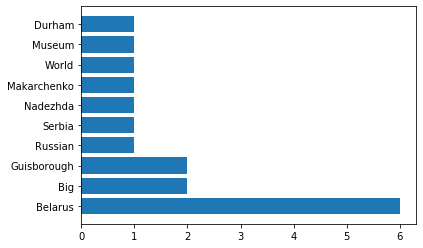

In [78]:
M = dict(list(Dict_Orga_2.items())[:10])
plt.barh(*zip(*M.items()))
plt.show()